<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Pie plots and Line graphs

For your first homework we are going to start with some very simple graph types that we can make with matplotlib. Both of these types of visualizations are more the kinds of things we expect to see in a popular outlet - such as a newspaper - than as scientific visualizations.

## Pie plots

Pie plots have some inherent limitations 9as we can see in our readings for this week). Pie plots have a very specific use: visualizing the relative contributions of various parts to a whole. They are not efficient at conveying fine differences among those components, or for making anything other than high-level comparisons between distributions. That being said, sometimes high-level comparisons are very useful, particularly in informal settings. Presenting a breakdown of spending by a club, department, or organization to the members is a good example use case. 

The function within pyplot to make a pie chart is `pie`, of course. Take a minute to look at <a href = 'https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.pie.html'>the definition of the pie function</a>. 

In particular, let's look at the first five parameters that are specified for this function (feel free to explore more on your own). 

x is the most important value. Notice that is says that x is 'array-like'. This means that x is going to be a list or array or date series of values that is going to determine the size of the slices that make up the pie. 

Below we will make two pie plots. In the first, I will specify some values of x that add up to 1.

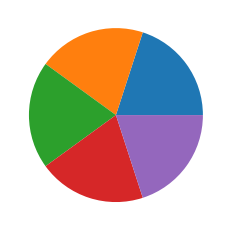

In [1]:
import matplotlib.pyplot as plt

plt.pie([0.2, 0.2, .2, 0.2,0.2])
plt.show()                               # this command displays the image as the output
                                         # the graph will still appear in an ipython notebook
                                         # (although not in a python script!) if we leave it out
                                         # but we get a cleaner output with it. Try commenting it
                                         # out to see the difference.

In the second let's add some numbers that don't add up to 1 (the values add up to 185) to see if we can figure out how this x-array gets translated by the function.  

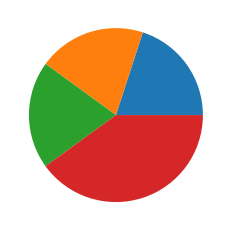

In [2]:
plt.pie([37,37,37,74])
plt.show() 

#
# it appears that the pie plot functions to use the relative proportions of the values.
# therefore the three equal sized wedges are 20 % (37/185) and the large wedge is 40 % (74/185)

**Question for you to answer:** Based on the description of the function and your observations here, how does the pie plot function go about calculating the size of the wedges? 







## Titles and Colors

Two things we can explore with a pie chart are introducing titles and modifying the color scheme. The way that pyplot works is that if we don't have to define all parts of a plot at once. If we define a chart, and then run additional pyplot functions they will be applied to the active chart. In the context of an ipython notebook all of the code for a particular plot has to appear within the same code cell. Adding a title is very easy, but very important for communication:
```
plt.title('The title of the plot')
```

To change colors within a plot there are a couple of different options. Color is added as a parameter within the   `pie` function. Python has a sequence of colors that it will run through automatically when coloring a plot, so if you leave this blank a predictable set of colors will be added. Otherwise, colors can be assigned individually to match particular data items. This requires passing pyplot another array-like object, like we did for the x value above. Python recognizes a wide range of color names, as shown in the example below. Another option is to find hex codes for the colors you want (from within photoshop, or at a <a href = 'https://www.color-hex.com/color-palettes/'> free color palette site</a>).

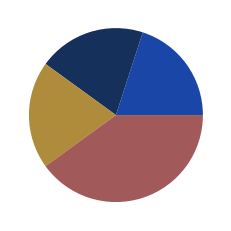

In [8]:
#col = ['cyan', 'pink', 'beige','chartreuse','black']  # note that I gave five colors, and fifth is not used
col = ['#1a47a7','#16305c','#ae8c3c','#a15959']      # these are hex codes that specify individual colors

plt.pie([37,37,37,74], colors = col)
#### add a plot title here

plt.show() 

**Assignment 1** In the 'data' folder associated with this notebook there is a file called 'pie_data.csv'. Import that data as a pandas dataframe (don't forget the preliminary step before you can use pandas). Now create a pie chart from this data. Each wedge of the pie should be labelled and should display the percentage represented by each wedge. Create a color scheme that makes sense for the graph and apply it. Pick a wedge of the pie and remove it from the rest of the pie to compare it to the others. Use each of `explode`, `labels`, `colors` and `autopct` in making your graph. Add a title that indicates the chart shows the number of pies sold each week from the TJU bakery department. 

         Kind  Number
0       Apple     457
1   Blueberry     344
2       Peach     375
3  Blackberry     150
4   Chocolate     247
5    Key_Lime     183
6     Coconut      80


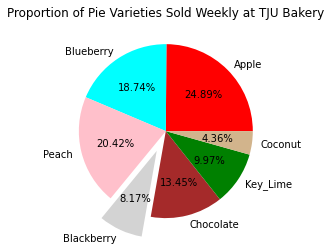

In [36]:
### Create your pie plot here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pie_data = pd.read_csv("pie_data.csv")
kind_data = pie_data["Kind"]
number_data = pie_data["Number"]
col = ["red","cyan","pink","#D3D3D3","brown","green","#D2B48C"]
explode = (0, 0, 0, 0.25, 0, 0, 0)

plt.pie(number_data, labels=kind_data, explode=explode, colors=col, autopct="%.2f%%")
plt.title("Proportion of Pie Varieties Sold Weekly at TJU Bakery")

print(pie_data)
plt.show()

## Line graphs
 
Line graphs are also a graph type that get a bit overused by novice visualizers, although they do have some scientific uses. In particular, line graphs are useful for tracking change in a value over time. Unlike a scatter plot, in which the assumption is generally that each x-y pair of values is independent of the others, a line graph tracks non-independent events.

Line graphs are created by the `.plot` function in pyplot. Looking at the <a href = 'https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html'>defintion of the plot function</a> we see that the primary parameters required by plot include an x and a y value, each of which is an array-like object. If we pass a single array of data, the function will assume this represents the y value. Run the code below to see the result

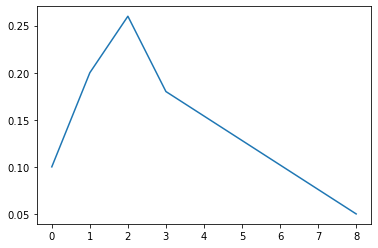

In [48]:
#plt.plot([0.1, 0.2, 0.26, 0.18, 0.05])                     # only y value provided
plt.plot([0,1,2,3,8],[0.1, 0.2, 0.26, 0.18, 0.05])        # x and y provided
plt.show() 

#
# the function, in absence of explicit x-values,
# plots the single array in such a way that the x-values are assumed to be the index+1 (1, 2, 3, 4, 5)

**Question for you to answer:** Based on the description of the function and your observations here, how does the plot function go about calculating the x values for the points displayed?




 

Labeling of line plots can be undertaken at multiple levels. The quick and dirty version is with an `fmt` (format) string, which allows you to specify shape of the marker, the color of the line and marker, and the line style with a single command. A guide to the allowable values can be found at the <a href = 'https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html'>defintion of the plot function</a>. However each of these parameters can be specified individually, along with many other options. The approaches can also be combined. In the examples below, which you should examine one at a time by removing the # symbol to make the other lines active, you should see that the first two examples are identical, where in the third the pattern created by the `fmt` sequence is modified by the subsequent parameters. Play around with the line graph parameters to create different shapes of the line below.

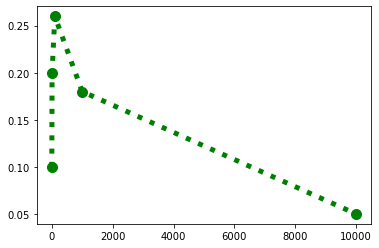

In [58]:
#plt.plot([0,1,2,3,4],[0.1, 0.2, 0.26, 0.18, 0.05],  '.r:') 
#plt.plot([0,1,2,3,4],[0.1, 0.2, 0.26, 0.18, 0.05],  marker = '.', color = 'red', linestyle = ':') 
plt.plot([1,10,100,1000,10000],[0.1, 0.2, 0.26, 0.18, 0.05],  '.g:', markersize = 20, linewidth = 5)
plt.show() 

## Multiple plots and labeling

One thing we can do with the plot function is to overlay multiple data series on a single plot. The easiest way to do this is to simply call the plot function multiple times in a row, as in the example below.

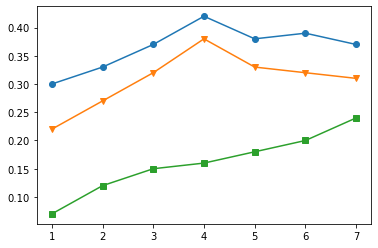

In [56]:
x = [1,2,3,4,5,6,7]
y1 = [0.3, 0.33, 0.37, 0.42, 0.38, 0.39,0.37]
y2 = [0.22, 0.27, 0.32, 0.38, 0.33, 0.32,0.31]
y3 = [0.07, 0.12, 0.15, 0.16, 0.18, 0.20,0.24]

plt.plot(x, y1,'o-')
plt.plot(x, y2,'v-')
plt.plot(x, y3,'s-')

plt.show()

There are a couple of things to notice in this example. First, despite the fact that I did not specify a color in my `fmt` string the program went ahead and applied colors to the graphs. Second, we can see that as plots are added a reasonable range on the y axis is maintained such that all points are accommodated within the figure.

This is all very nice, but there are still some things going on with this figure that are quite unfortunate. It's very hard to see what this figure is about because it's poorly labelled. We are now going to run through some basic labeling tools that will make your figures easier to interpret. Rather than run through these individually, I'm going to include them in the body of the code below. Most of them are pretty self-explanatory.


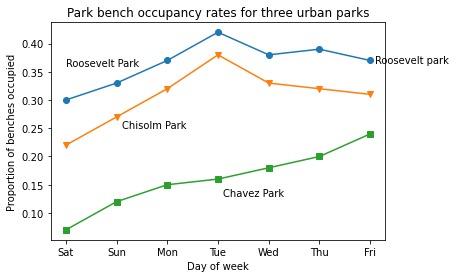

In [60]:
x = [1,2,3,4,5,6,7]                                # To make my code easier to read I am defining my values outside
y1 = [0.3, 0.33, 0.37, 0.42, 0.38, 0.39,0.37]      ## of the code I am using to make the plots
y2 = [0.22, 0.27, 0.32, 0.38, 0.33, 0.32,0.31]
y3 = [0.07, 0.12, 0.15, 0.16, 0.18, 0.20,0.24]

plt.plot(x, y1,'o-')
plt.plot(x, y2,'v-')
plt.plot(x, y3,'s-')

# Here we set the text we want to use for labeling the title, the x and the y axis
xlab = 'Day of week'
ylab = 'Proportion of benches occupied'
title = 'Park bench occupancy rates for three urban parks'

#This section can therefore be cut and pasted into any script that you are using to make a graph with labels,
## the names of these functions are pretty self-explanatory I hope!

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

# Since this is day of week data, we may want to replace our numerical placeholders 
##  with labels that show the day of the week.

xticks_lab = ['Sat','Sun','Mon', 'Tue', 'Wed','Thu','Fri']
plt.xticks(x, xticks_lab)                                   # plt.xticks requires us to set the tick values and the 
                                                            # labels for those ticks. Since at the top of the graph
                                                            # graph I had already set my x values as 'x' I just
                                                            # recycled that here.

            
#Finally, we might want to add text labels to identify the individual lines. 

plt.text(1 , 0.36, 'Roosevelt Park')              # The first two values are the x and y coordinates on the graph
plt.text(2.1 , 0.25, 'Chisolm Park')              ## where the text will begin. It is trial and error to get the 
plt.text(4.1 , 0.130, 'Chavez Park')              ## labels in just the right location

plt.text(7.1 , 0.365, 'Roosevelt park')          # One 'neater' solution to this is to label the ends of the lines.
                                                  # Uncomment this line and you will see that the graph area does not
                                                  # adjust itself to these additional textual elements. So we won't
                                                  # be able to do this until we get more control over the layout
                                                  # of the figure itself.
plt.show()


**Assignment 2** In the 'data' folder associated with this notebook there is a file called 'line_data.csv'. This data represents the average number of people waiting in line to buy pies at the TJU bakery dept at different hours of the day. The data is in two series representing weekday and weekend averages, and the hour value represents the hour starting at that time, in military time (so 13 = the hour from 1-2 PM).

Import that data as a pandas dataframe. Now create a line graph from this data. Label the graph and all axes appropriately. Label the lines in the body of the graph. Adjust markers, lines, and colors to create an individualized graph. 

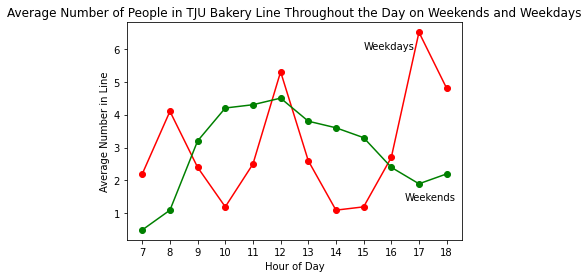

In [85]:
#Create your line plot here

import numpy as np
import pandas as pd

line_data = pd.read_csv("line_data.csv")
x = line_data["Hour"]
y1 = line_data["Weekday"]
y2 = line_data["Weekend"]
plt.plot(x, y1,'ro-')
plt.plot(x, y2,'go-')

xlab = "Hour of Day"
ylab = "Average Number in Line"
title = "Average Number of People in TJU Bakery Line Throughout the Day on Weekends and Weekdays"
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.xticks(x, x)
plt.text(16.5 , 1.4, 'Weekends')              # The first two values are the x and y coordinates on the graph
plt.text(15 , 6, 'Weekdays') 

plt.show()

#
# It appears that on weekdays, there are distinct time periods when the line is longest (breakfast/lunch/dinner).
# Meanwhile, on weekends there is no distinct influxes, but rather the number of patrons simply rises and falls as the day progresses.
# 
# Yes, I beleive that this line graph is easily interpretable,even for the average person without familiarity with this particular data set.

**Question for you to answer:** Interpret your data in two sentences. Do you think that your graph allows for straightforward intepretation by someone who is new to the data?








![Alt text that will appear on mouseover](images/TJU_logo_dummy_image.png "TJU logo")